In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import pybel
from decaf import utils
from decaf.toolkits import ob

from glob import glob

%matplotlib inline

In [2]:
current_palette = sns.color_palette("muted")
sns.set_palette(current_palette)

In [3]:
sns.set_style("whitegrid")
sns.set_context("paper")

In [4]:
sns.plotting_context()

{'axes.labelsize': 8.8,
 'axes.titlesize': 9.600000000000001,
 'figure.figsize': [6.4, 4.4],
 'font.size': 9.600000000000001,
 'grid.linewidth': 0.8,
 'legend.fontsize': 8.0,
 'lines.linewidth': 1.4000000000000001,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 5.6000000000000005,
 'patch.linewidth': 0.24,
 'xtick.labelsize': 8.0,
 'xtick.major.pad': 5.6000000000000005,
 'xtick.major.width': 0.8,
 'xtick.minor.width': 0.4,
 'ytick.labelsize': 8.0,
 'ytick.major.pad': 5.6000000000000005,
 'ytick.major.width': 0.8,
 'ytick.minor.width': 0.4}

In [5]:
cutoffs = [a/10.0 for a in xrange(1,10)]
colnames = ["score"+str(c) for c in cutoffs]
cnum = len(cutoffs)

In [6]:
methods = ["DeCAF", "FP2", "FP3", "FP4", "MACCS"]

In [7]:
usr_methods = ["USRCAT_30", "USRCAT_1"]

In [8]:
all_methods = methods + usr_methods

# Data

In [9]:
targets = []
for i in glob("../data/targets/*"):
    name = i.split("/")[-1][:-4]
    targets.append(name)

In [10]:
drug_targets = pd.read_csv("../data/drug_targets.csv", index_col=0)
drug_targets.head()

,drug,target,pred
5,Acebutolol,ADRB2,old
6,Acebutolol,ADRB1,old
9,Acetaminophen,PTGS1,old
17,Acetaminophen,PTGS2,old
40,Acetophenazine,DRD1,old


In [11]:
np.sum(drug_targets["pred"] == "new")

150

In [12]:
np.sum(drug_targets["pred"] == "old")

1079

In [13]:
np.sum(drug_targets["pred"] == "drugbank")

82

In [14]:
found_drugs = pd.read_csv("../data/drugs_chembl.csv", index_col=0)
found_drugs.head()

,drug,chembl_id,SMILES
0,Acarbose,CHEMBL1566,CC1C(NC2C(O)C(O)C(O)C(CO)=C2)C(O)C(O)C(OC3C(O)...
1,Acebutolol,CHEMBL642,CCCC(Nc1ccc(OCC(CNC(C)C)O)c(C(=O)C)c1)=O
2,Aceclofenac,CHEMBL93645,OC(COC(Cc1c(Nc2c(Cl)cccc2Cl)cccc1)=O)=O
3,Acenocoumarol,CHEMBL397420,CC(CC(C1=C(O)c(c2OC1=O)cccc2)c3ccc([N+](=O)[O-...
4,Acetaminophen,CHEMBL112,CC(Nc1ccc(O)cc1)=O


In [15]:
trivial = pd.read_csv("../data/trivial_hits.csv", index_col=0)
chemb_low_activity = pd.read_csv("../data/chembl_low_activity_hits.csv", index_col=0)

# Similarity score distributions

In [16]:
def sample_file(method):
    return "../data/statistical_model/results/" + method +  "/sample56_1002.tab.bz2"

DeCAF
mean 0.307192964409 SD 0.10115819633
25th, 50th and 75th percentiles [0.23383084577100002 0.300653594771 0.37037037037]
sim>=0.5 for 3.94510978044 % of pair(s)
sim>=0.6 for 0.678642714571 % of pair(s)
sim>=0.7 for 0.112774451098 % of pair(s)
sim>=0.8 for 0.0199600798403 % of pair(s)
sim>=0.9 for 0.00399201596806 % of pair(s)
sim=1 for 0.0 % of pair(s)

FP2
mean 0.188055880546 SD 0.0696717414934
25th, 50th and 75th percentiles [0.141552511416 0.18279569892499997 0.228155339806]
sim>=0.5 for 0.129740518962 % of pair(s)
sim>=0.6 for 0.0389221556886 % of pair(s)
sim>=0.7 for 0.0109780439122 % of pair(s)
sim>=0.8 for 0.00499001996008 % of pair(s)
sim>=0.9 for 0.0 % of pair(s)
sim=1 for 0.0 % of pair(s)

FP3
mean 0.49206601024 SD 0.169187058171
25th, 50th and 75th percentiles [0.375 0.46666666666699996 0.6]
sim>=0.5 for 49.6017964072 % of pair(s)
sim>=0.6 for 25.1846307385 % of pair(s)
sim>=0.7 for 12.4291417166 % of pair(s)
sim>=0.8 for 6.37924151697 % of pair(s)
sim>=0.9 for 1.769461

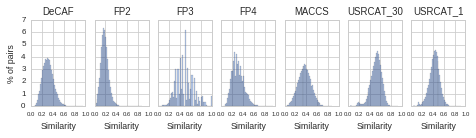

In [17]:
f, ax = plt.subplots(ncols=len(all_methods), sharey=True, figsize=(6.7,2), dpi=300)
q = [25,50,75]
ticks = [i/10.0 for i in xrange(0, 12, 2)]
labels = [str(i) for i in ticks]

for i in xrange(len(all_methods)):
    tmp = pd.read_table(sample_file(all_methods[i]))
    partial_scores = tmp.values[:, 1:].flatten()

    sns.distplot(partial_scores, kde=False, norm_hist=True, ax=ax[i])
    ax[i].set_title(all_methods[i])
    ax[i].set_xlabel("Similarity")
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels, fontsize=6)
    ax[i].grid(True, which="major") 
    if i == 0:
        ax[i].set_ylabel("% of pairs")
    print all_methods[i]
    print "mean", np.mean(partial_scores), "SD", np.std(partial_scores)
    print "25th, 50th and 75th percentiles", np.percentile(partial_scores, q)
    for c in [0.5, 0.6, 0.7, 0.8, 0.9]:
        print "sim>="+str(c)+" for", 100.0 * np.sum(partial_scores >= c) / partial_scores.size, "% of pair(s)"
    print "sim=1 for", 100.0 * np.sum(partial_scores == 1.0) / partial_scores.size, "% of pair(s)"
    print ""

f.tight_layout(w_pad=0.01)
f.savefig("../figures/partial_scores_distribution.pdf")

## Similarity to other active ligands

In [18]:
def active_sample(method):
    tab = pd.read_table("../data/results/" + method + "/DRD2.tab.bz2")
    return tab[tab["name"] == "Amoxapine"].values[:, 1:].flatten()

In [19]:
q = [25, 50, 75]

for i in xrange(len(methods)):

    partial_scores = active_sample(methods[i])
    print methods[i]
    print "mean", np.mean(partial_scores), "SD", np.std(partial_scores)
    print "25th, 50th and 75th percentiles", np.percentile(partial_scores, q)
    for c in [0.5, 0.6, 0.7, 0.8, 0.9]:
        print "sim>="+str(c)+" for", 100.0 * np.sum(partial_scores >= c) / partial_scores.size, "% of pair(s)"
    print "sim=1 for", 100.0 * np.sum(partial_scores == 1.0) / partial_scores.size, "% of pair(s)"
    print ""

DeCAF
mean 0.382788649535 SD 0.111656944247
25th, 50th and 75th percentiles [0.31733333333299996 0.374774774775 0.421212121212]
sim>=0.5 for 8.04302456253 % of pair(s)
sim>=0.6 for 3.74056830952 % of pair(s)
sim>=0.7 for 2.95392518863 % of pair(s)
sim>=0.8 for 1.79804141917 % of pair(s)
sim>=0.9 for 0.417402472307 % of pair(s)
sim=1 for 0.0160539412426 % of pair(s)

FP2
mean 0.191422074854 SD 0.0477819274239
25th, 50th and 75th percentiles [0.160642570281 0.188191881919 0.217777777778]
sim>=0.5 for 0.0802697062129 % of pair(s)
sim>=0.6 for 0.0802697062129 % of pair(s)
sim>=0.7 for 0.0802697062129 % of pair(s)
sim>=0.8 for 0.0642157649703 % of pair(s)
sim>=0.9 for 0.0481618237277 % of pair(s)
sim=1 for 0.0321078824852 % of pair(s)

FP3
mean 0.574099538998 SD 0.109163827128
25th, 50th and 75th percentiles [0.5 0.5714285714289999 0.666666666667]
sim>=0.5 for 79.8201958581 % of pair(s)
sim>=0.6 for 44.6620645368 % of pair(s)
sim>=0.7 for 16.7763685985 % of pair(s)
sim>=0.8 for 0.2729170011

## "Identical" molecules

In [20]:
tmp = pd.read_table(sample_file("FP3"))
idx = np.where(tmp.values == 1)
print tmp.iloc[idx[0], [0] + list(idx[1])];

             name  CHEMBL1412245  CHEMBL215751  CHEMBL1560670  CHEMBL1534213  \
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.000000       1.000000       1.000000   
0   CHEMBL1302458       1.000000      1.

Completely different molecules with Tc=1:
    [CHEMBL1560670](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1560670) and [CHEMBL1302458](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1302458)

In [21]:
mol1 = pybel.readstring("smi", "CC1CCN(CC1)C(=O)COc2ccc3OC(=O)C=C(C)c3c2")
mol2 = pybel.readstring("smi", "COc1ccccc1OCC(=O)NCCCn2ccnc2")

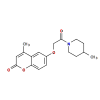

In [22]:
mol1

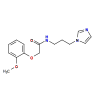

In [23]:
mol2

In [24]:
for fp in ["FP3", "FP2", "FP4", "MACCS"]:
    print fp, mol1.calcfp(fp) | mol2.calcfp(fp)

FP3 1.0
FP2 0.4
FP4 0.478260869565
MACCS 0.606060606061


# Z-score values

In [25]:
datasets = pd.DataFrame(columns=["method", "drug", "target", "z_score"])

for method in methods:
    tmp = pd.read_csv("../data/results/"+method+"_all_results.csv",
                      index_col=0).groupby(["drug", "target"])[["z_score"]].max().reset_index()
    tmp["method"] = method
    datasets = pd.concat([datasets, tmp], ignore_index=True)

datasets.head()

,drug,method,target,z_score
0,Acarbose,DeCAF,ADORA1,-0.268981
1,Acarbose,DeCAF,ADORA2A,-0.252416
2,Acarbose,DeCAF,ADORA3,-0.097080
3,Acarbose,DeCAF,ADRA1A,-0.246426
4,Acarbose,DeCAF,ADRA2A,-0.187612


In [26]:
usr_datasets = pd.DataFrame(columns=["method", "drug", "target", "z_score"])

for method in usr_methods:
    tmp = pd.read_csv("../data/results/"+method+"_all_results.csv",
                      index_col=0).groupby(["drug", "target"])[["z_score"]].max().reset_index()
    tmp["method"] = method
    usr_datasets = pd.concat([usr_datasets, tmp], ignore_index=True)

targets = set(list(usr_datasets["target"].unique()))


# ignore DeCAF results for cutoff=0.9 - it was impossible to fit parameters for USRCAT
tmp = pd.read_csv("../data/results/DeCAF_all_results.csv", index_col=0)
tmp = tmp.loc[tmp.apply(lambda x: (x["target"] in targets) and (x["cutoff"] != 0.9), axis=1)]
tmp = tmp.groupby(["drug", "target"])[["z_score"]].max().reset_index()
tmp["method"] = "DeCAF"
usr_datasets = pd.concat([usr_datasets, tmp], ignore_index=True)

usr_methods.insert(0, "DeCAF")

usr_datasets.head()

,drug,method,target,z_score
0,Acarbose,USRCAT_30,ADORA3,-0.168013
1,Acarbose,USRCAT_30,ADRB1,-0.311759
2,Acarbose,USRCAT_30,AVPR1A,-0.296778
3,Acarbose,USRCAT_30,AVPR2,-0.270513
4,Acarbose,USRCAT_30,BDKRB1,-0.276990


In [27]:
tmp = pd.concat([drug_targets[["drug", "target"]], trivial[["drug", "target"]],
                 chemb_low_activity[["drug", "target"]]], ignore_index=True)
tmp["activity"] = True
tmp.drop_duplicates(inplace=True)
print tmp.shape
tmp.head()

(2144, 3)


,drug,target,activity
0,Acebutolol,ADRB2,True
1,Acebutolol,ADRB1,True
2,Acetaminophen,PTGS1,True
3,Acetaminophen,PTGS2,True
4,Acetophenazine,DRD1,True


In [28]:
datasets = pd.merge(datasets, tmp, how='left')
datasets.fillna(False, inplace=True)
datasets.head()

,drug,method,target,z_score,activity
0,Acarbose,DeCAF,ADORA1,-0.268981,False
1,Acarbose,DeCAF,ADORA2A,-0.252416,False
2,Acarbose,DeCAF,ADORA3,-0.097080,False
3,Acarbose,DeCAF,ADRA1A,-0.246426,False
4,Acarbose,DeCAF,ADRA2A,-0.187612,False


In [29]:
usr_datasets = pd.merge(usr_datasets, tmp, how='left')
usr_datasets.fillna(False, inplace=True)
usr_datasets.head()

,drug,method,target,z_score,activity
0,Acarbose,USRCAT_30,ADORA3,-0.168013,False
1,Acarbose,USRCAT_30,ADRB1,-0.311759,False
2,Acarbose,USRCAT_30,AVPR1A,-0.296778,False
3,Acarbose,USRCAT_30,AVPR2,-0.270513,False
4,Acarbose,USRCAT_30,BDKRB1,-0.276990,False


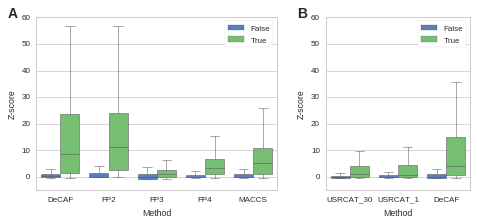

In [30]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.7,3), dpi=300)

ax1.set_position([0.07, 0.15, 0.5, 0.8])
ax2.set_position([0.67, 0.15, 0.3, 0.8])

sns.boxplot(x="method", y="z_score", hue="activity", fliersize=0, data=datasets,
            ax=ax1, linewidth=0.5)
ax1.set_ylim([-5,60]);
ax1.legend(loc=1, frameon=True)
ax1.set_xlabel("Method")
ax1.set_ylabel("Z-score")
f.text(0.01, 0.95, "A", fontdict={"fontsize": "x-large", "weight": "bold"})

sns.boxplot(x="method", y="z_score", hue="activity", fliersize=0, data=usr_datasets,
            ax=ax2, linewidth=0.5)
ax2.set_ylim([-5,60]);
ax2.legend(loc=1, frameon=True)
ax2.set_xlabel("Method")
ax2.set_ylabel("Z-score")
f.text(0.61, 0.95, "B", fontdict={"fontsize": "x-large", "weight": "bold"})

f.savefig("../figures/z_scores.pdf")

For FP4, MACCS and USRCAT we get high random score, so it is very hard to get high Z-score.

True and false prediction are quite well separated, but difference between them is small.

It would be hard to select Z-score cutoff for real-life problem - small changes can heavily affect results.

# Enrichment

In [31]:
def EF(dataset, frac):
    tmp = dataset.sort_values("z_score", ascending=False)
    p = float(true_pred) / all_pairs
    EF = []
    enr = ((tmp["activity"]).cumsum().as_matrix() / np.arange(1, tmp.shape[0]+1, dtype=float)) / p
    for f in frac:
        EF.append(enr[int(f*all_pairs)-1])
    return EF

In [32]:
frac = [0.0025, 0.01, 0.05, 0.1]

In [33]:
def predictions_found(dataset, all_pairs, frac=0.1, colname="activity"):
    tmp = dataset.sort_values("z_score", ascending=False)
    tr = np.sum(dataset[colname])
    found = ((tmp[colname]).cumsum() / tr)
    end = int(frac * all_pairs)
    return 100.0*np.arange(end, dtype=float) / all_pairs, 100*found[:end]

In [34]:
def auc(x1, x2):
    x = sorted([(x1[i], x2[i]) for i in xrange(len(x1))])
    s = 0.0
    for i in xrange(1,len(x)):
        if x[i][0] != x[i-1][0]:
            s += (x[i][0]-x[i-1][0])*(x[i][1]+x[i-1][1])/2.0
    return s

## Fingerprints

In [35]:
true_pred = np.sum(datasets[datasets["method"] == "DeCAF"]["activity"])
all_pairs = datasets[datasets["method"] == "DeCAF"].shape[0]
true_pred, all_pairs

(2144, 47888)

In [36]:
for m in methods:
    print m, EF(datasets[datasets["method"] == m], frac)

DeCAF [19.708077260755047, 15.653765690376568, 10.31888801606005, 6.6755554932106387]
FP2 [13.514110121660604, 12.429557234746767, 9.7124434219878051, 6.4049879050860978]
FP3 [0.0, 1.8691063510897394, 2.2111902891557249, 2.117891120836918]
FP4 [14.452589991220369, 12.616467869855741, 7.7251711367972167, 5.8778476040848382]
MACCS [17.080333625987706, 13.924842315618561, 9.5258450853501913, 6.0924356912180953]


In [37]:
colors = {methods[i]: current_palette[i] for i in xrange(len(methods))}

DeCAF 0.851722270362
FP2 0.853975812993
FP3 0.67288041283
FP4 0.827146510406
MACCS 0.821996652648


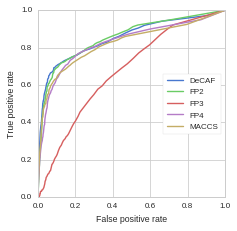

In [38]:
f, ax = plt.subplots(figsize=(3.35, 3.35))
for m in methods:

    tmp = datasets[datasets['method'] == m]

    step = 0.1
    x = []
    y = []
    groups = tmp.groupby("activity")
    for c in np.arange(tmp["z_score"].min(), tmp["z_score"].max(), step):
        t = groups["z_score"].agg(lambda k: sum([1 for i in k if i>=c])/float(len(k)))
        x.append(t[1])
        y.append(t[0])

    print m, auc(y, x)

    ax.plot(y, x, c=colors[m], label=m)
ax.legend(loc=5, frameon=True)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
f.savefig('../figures/supplementary/fp_roc.pdf')

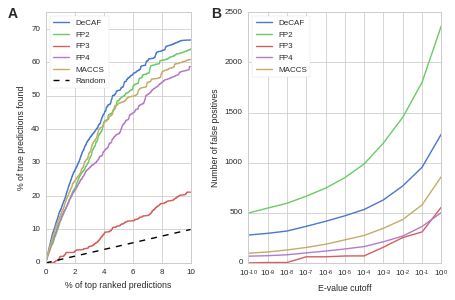

In [39]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.7,4), dpi=300)

ax1.set_position([0.1, 0.1, 0.3, 0.87])
ax2.set_position([0.52, 0.1, 0.4, 0.87])

for m in methods:
    x, y = predictions_found(datasets[datasets["method"] == m], all_pairs=all_pairs)
    ax1.plot(x, y, label=m, c=colors[m])
ax1.plot([0,10.0], [0, 10.0], 'k--', label="Random")
ax1.set_ylim(0, 75)
ax1.legend(loc=2, frameon=True)
ax1.set_xlabel("% of top ranked predictions")
ax1.set_ylabel("% of true predictions found")
f.text(0.02, 0.95, "A", fontdict={"fontsize": "x-large", "weight": "bold"})


for m in methods:
    tmp = pd.read_csv("../data/results/"+m+"_summary_e.csv", index_col=0)
#     ax2.plot(tmp.index, tmp["true"], label=(m+" true pred."), c=colors[m])
    ax2.plot(tmp.index, tmp["false"], label=m, c=colors[m])
ax2.set_xscale("log", nonposx='clip')
ax2.legend(loc=0, frameon=True)
ax2.set_xlabel("E-value cutoff")
ax2.set_ylabel("Number of false positives")
ax2.xaxis.grid(True, which='major')
ax2.xaxis.grid(False, which='minor')
f.text(0.442, 0.95, "B", fontdict={"fontsize": "x-large", "weight": "bold"})

f.savefig("../figures/top_ranked+false_pred_num.pdf")

## USRCAT

In [40]:
true_pred = np.sum(usr_datasets[usr_datasets["method"] == "DeCAF"]["activity"])
all_pairs = usr_datasets[usr_datasets["method"] == "DeCAF"].shape[0]
true_pred, all_pairs

(237, 17056)

In [41]:
for m in usr_methods:
    print m, EF(usr_datasets[usr_datasets["method"] == m], frac)

DeCAF [37.696604380148685, 22.859865971705137, 9.3758839959588745, 5.6137891780194762]
USRCAT_30 [35.983122362869196, 19.473219161082152, 6.9263287177353856, 4.2208941188116365]
USRCAT_1 [42.837050431987144, 18.203226607098536, 6.335056754026267, 3.8410136481185893]


In [42]:
colors = {usr_methods[i]: current_palette[i] for i in xrange(len(usr_methods))}

DeCAF 0.801215121636
USRCAT_30 0.743383951694
USRCAT_1 0.696303256589


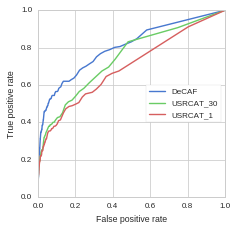

In [43]:
f, ax = plt.subplots(figsize=(3.35, 3.35))
for m in usr_methods:

    tmp = usr_datasets[usr_datasets['method'] == m]

    step = 0.1
    x = []
    y = []
    groups = tmp.groupby("activity")
    for c in np.arange(tmp["z_score"].min(), tmp["z_score"].max(), step):
        t = groups["z_score"].agg(lambda k: sum([1 for i in k if i>=c])/float(len(k)))
        x.append(t[1])
        y.append(t[0])
    
    print m, auc(y, x)

    ax.plot(y, x, c=colors[m], label=m)
ax.legend(loc=5, frameon=True)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

f.savefig("../figures/usrcat_roc.pdf")

# Examples of false predictions

## False positives for FP2

In [44]:
all_data_FP2 = pd.read_csv("../data/results/FP2_all_results.csv", index_col=0)
all_data_DeCAF = pd.read_csv("../data/results/DeCAF_all_results.csv", index_col=0)

In [45]:
all_data_FP2[(all_data_FP2["target"] == "NTSR1") &
             (all_data_FP2["e_value"] < 0.0001)].groupby("drug")[["p_value", "e_value"]].min()

,p_value,e_value
drug,,
Ajmaline,1.363809e-10,6.531009e-06
Amoxicillin,1.129078e-24,5.406930e-20
Amprenavir,7.281132e-10,3.486789e-05
Arformoterol,8.690940e-10,4.161917e-05
Aripiprazole,1.949844e-10,9.337411e-06
Astemizole,1.098167e-09,5.258903e-05
Atazanavir,1.965095e-14,9.410446e-10
Benazepril,3.004457e-37,1.438775e-32
Bentiromide,4.533974e-49,2.171230e-44


In [46]:
all_data_FP2[(all_data_FP2["target"] == "NTSR1") & (all_data_FP2["drug"] == "Nateglinide")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
411,0.1,Nateglinide,90.346724,167.0,NTSR1,8.925767,5.992754e-06,2.869810e-01
411,0.2,Nateglinide,90.346724,167.0,NTSR1,9.231885,4.046855e-06,1.937958e-01
411,0.3,Nateglinide,86.630884,167.0,NTSR1,28.896451,4.506825e-17,2.158228e-12
411,0.4,Nateglinide,83.190623,167.0,NTSR1,106.256077,3.666275e-60,1.755706e-55
411,0.5,Nateglinide,78.534611,167.0,NTSR1,366.254005,5.549545e-205,2.657566e-200
411,0.6,Nateglinide,37.033056,167.0,NTSR1,410.252787,1.724829e-229,8.259860e-225
411,0.7,Nateglinide,8.619117,167.0,NTSR1,159.386194,9.343741e-90,4.474531e-85
411,0.8,Nateglinide,0.000000,167.0,NTSR1,-0.103532,4.733343e-01,2.266703e+04
411,0.9,Nateglinide,0.000000,167.0,NTSR1,-0.067214,4.577391e-01,2.192021e+04


In [47]:
all_data_DeCAF[(all_data_DeCAF["target"] == "NTSR1") & (all_data_DeCAF["drug"] == "Nateglinide")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
411,0.1,Nateglinide,63.086222,167.0,NTSR1,1.481594,0.080531,3856.445349
411,0.2,Nateglinide,62.637845,167.0,NTSR1,1.282454,0.102722,4919.133876
411,0.3,Nateglinide,53.529534,167.0,NTSR1,1.580879,0.071254,3412.210820
411,0.4,Nateglinide,37.118152,167.0,NTSR1,2.928907,0.013033,624.145356
411,0.5,Nateglinide,0.641667,167.0,NTSR1,-0.927579,0.841966,40320.084852
411,0.6,Nateglinide,0.641667,167.0,NTSR1,-0.056355,0.453129,21699.455721
411,0.7,Nateglinide,0.000000,167.0,NTSR1,-0.439318,0.627056,30028.447371
411,0.8,Nateglinide,0.000000,167.0,NTSR1,-0.231313,0.530164,25388.494726
411,0.9,Nateglinide,0.000000,167.0,NTSR1,-0.093023,0.468794,22449.603717


In [48]:
NTSR1_FP2 = pd.read_table("../data/results/FP2/NTSR1.tab.bz2")

NTSR1_FP2[NTSR1_FP2["name"] == "Nateglinide"].iloc[:, :-cnum]

,name,CHEMBL1242923,CHEMBL1242950,CHEMBL342252,CHEMBL1790460,CHEMBL1790467,CHEMBL1790470,CHEMBL8454,CHEMBL8857,CHEMBL427656,...,CHEMBL258221,CHEMBL2369722,CHEMBL2369627,CHEMBL2369133,CHEMBL2370477,CHEMBL2369629,CHEMBL2431105,CHEMBL2370479,CHEMBL2370478,CHEMBL2369628
411,Nateglinide,0.346939,0.488636,0.607143,0.622807,0.601695,0.68,0.717172,0.606838,0.579832,...,0.717172,0.581197,0.45,0.581967,0.533835,0.568,0.284444,0.572581,0.47651,0.533835


In [49]:
NTSR1_dcf = pd.read_table("../data/results/DeCAF/NTSR1.tab.bz2")

NTSR1_dcf[NTSR1_dcf["name"] == "Nateglinide"].iloc[:, :-cnum]

,name,CHEMBL1242923,CHEMBL1242950,CHEMBL342252,CHEMBL1790460,CHEMBL1790467,CHEMBL1790470,CHEMBL8454,CHEMBL8857,CHEMBL427656,...,CHEMBL258221,CHEMBL2369722,CHEMBL2369627,CHEMBL2369133,CHEMBL2370477,CHEMBL2369629,CHEMBL2431105,CHEMBL2370479,CHEMBL2370478,CHEMBL2369628
411,Nateglinide,0.382979,0.641667,0.427513,0.434409,0.408081,0.498765,0.489697,0.448889,0.456497,...,0.44153,0.379343,0.295971,0.299259,0.292754,0.277663,0.251366,0.299259,0.295971,0.292754


For FP2 we can get high Tc between drugs with very different sizes e.g.:

NTSR1:
  [Nateglinide](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL249263)
  [CHEMBL8454](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL8454)
  [CHEMBL1790460](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1790460)

# False negatives for FP2

In [50]:
drug_targets[drug_targets["target"] == "ESR1"]

,drug,target,pred
668,Chlorotrianisene,ESR1,old
967,Danazol,ESR1,old
1109,Dienestrol,ESR1,old
1113,Diethylstilbestrol,ESR1,old
1356,Estradiol beta,ESR1,old
1372,Ethinyl estradiol,ESR1,old
1505,Fluoxymesterone,ESR1,old
1628,Genistein,ESR1,old
2089,Masoprocol,ESR1,old
2102,Medroxyprogesterone,ESR1,old


In [51]:
all_data_FP2[(all_data_FP2["target"] == "ESR1") &
             (all_data_FP2["e_value"] >= 0.0001)].groupby("drug")[["p_value", "e_value"]].min().tail(50)

,p_value,e_value
drug,,
Tolazamide,0.484927,23222.169035
Tolbutamide,0.484927,23222.169035
Tolcapone,0.257077,12310.908418
Tolnaftate,0.438848,21015.566099
Tolterodine,0.000010,0.464352
Topiramate,0.484927,23222.169035
Torasemide,0.484927,23222.169035
Tramadol,0.000046,2.225748
Tranexamic acid,0.484927,23222.169035


In [52]:
all_data_FP2[(all_data_FP2["target"] == "ESR1") & (all_data_FP2["drug"] == "Trilostane")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
620,0.1,Trilostane,91.251648,1305.0,ESR1,-2.757314,1.000000,47887.999798
620,0.2,Trilostane,22.319210,1305.0,ESR1,-1.768378,0.995590,47676.821076
620,0.3,Trilostane,15.762764,1305.0,ESR1,-0.498691,0.655054,31369.231645
620,0.4,Trilostane,0.000000,1305.0,ESR1,-0.779040,0.782362,37465.732732
620,0.5,Trilostane,0.000000,1305.0,ESR1,-0.634881,0.718467,34405.941605
620,0.6,Trilostane,0.000000,1305.0,ESR1,-0.499716,0.655536,31392.324101
620,0.7,Trilostane,0.000000,1305.0,ESR1,-0.329105,0.575274,27548.716067
620,0.8,Trilostane,0.000000,1305.0,ESR1,-0.205012,0.518243,24817.637453
620,0.9,Trilostane,0.000000,1305.0,ESR1,-0.130138,0.484927,23222.169035


In [53]:
all_data_DeCAF[(all_data_DeCAF["target"] == "ESR1") & (all_data_DeCAF["drug"] == "Trilostane")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
620,0.1,Trilostane,411.740760,1305.0,ESR1,0.239690,3.382498e-01,1.619811e+04
620,0.2,Trilostane,397.911261,1305.0,ESR1,0.338223,3.050070e-01,1.460618e+04
620,0.3,Trilostane,204.867941,1305.0,ESR1,-0.393936,6.056655e-01,2.900411e+04
620,0.4,Trilostane,107.801934,1305.0,ESR1,0.064303,4.037008e-01,1.933242e+04
620,0.5,Trilostane,68.693179,1305.0,ESR1,1.723782,5.968558e-02,2.858223e+03
620,0.6,Trilostane,61.853396,1305.0,ESR1,7.396168,4.261981e-05,2.040977e+00
620,0.7,Trilostane,45.734478,1305.0,ESR1,22.616924,1.417755e-13,6.789344e-09
620,0.8,Trilostane,35.291401,1305.0,ESR1,68.948625,2.211246e-39,1.058921e-34
620,0.9,Trilostane,7.311785,1305.0,ESR1,67.470570,1.472041e-38,7.049311e-34


In [54]:
ESR1_FP2 = pd.read_table("../data/results/FP2/ESR1.tab.bz2")

ESR1_FP2[ESR1_FP2["name"] == "Trilostane"].iloc[:, :-cnum]

,name,CHEMBL165,CHEMBL1200623,CHEMBL83,CHEMBL81,CHEMBL954,CHEMBL2079587,CHEMBL135,CHEMBL282575,CHEMBL103,...,CHEMBL2179254,CHEMBL2401848,CHEMBL2178792,CHEMBL2179251,CHEMBL2178793,CHEMBL2179257,CHEMBL2179252,CHEMBL2178794,CHEMBL2332588,CHEMBL2332590
620,Trilostane,0.07377,0.322581,0.132867,0.1,0.120805,0.110345,0.131783,0.119497,0.230769,...,0.051546,0.147619,0.051813,0.052356,0.051546,0.047368,0.051282,0.052381,0.054795,0.051282


In [55]:
ESR1_dcf = pd.read_table("../data/results/DeCAF/ESR1.tab.bz2")

ESR1_dcf[ESR1_dcf["name"] == "Trilostane"].iloc[:, :-cnum]

,name,CHEMBL165,CHEMBL1200623,CHEMBL83,CHEMBL81,CHEMBL954,CHEMBL2079587,CHEMBL135,CHEMBL282575,CHEMBL103,...,CHEMBL2179254,CHEMBL2401848,CHEMBL2178792,CHEMBL2179251,CHEMBL2178793,CHEMBL2179257,CHEMBL2179252,CHEMBL2178794,CHEMBL2332588,CHEMBL2332590
620,Trilostane,0.303333,0.818182,0.243972,0.217284,0.238889,0.8,0.84031,0.709333,0.82963,...,0.222667,0.17641,0.218301,0.218301,0.224837,0.227211,0.222667,0.214103,0.25303,0.25303


Very similar molecules with very low scores for FP2:

ESR1:
    [Trilostane](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1200907)
    [CHEMBL135](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL135)

# False positives for DeCAF

In [56]:
drug_targets[drug_targets["target"] == "NR1I2"]

,drug,target,pred
1355,Estradiol beta,NR1I2,old
1371,Ethinyl estradiol,NR1I2,old
3027,Rifampicin,NR1I2,old
3030,Rifaximin,NR1I2,old
50,Paclitaxel,NR1I2,drugbank


In [57]:
all_data_DeCAF[(all_data_DeCAF["target"] == "NR1I2") &
             (all_data_DeCAF["e_value"] < 0.0001)].groupby("drug")[["p_value", "e_value"]].min()

,p_value,e_value
drug,,
Amlodipine,1.017741e-12,4.873760e-08
Anecortave,1.822322e-24,8.726737e-20
Camostat,1.907585e-12,9.135044e-08
Croconazole hydrochloride,7.375889e-11,3.532166e-06
Cyproterone,1.096634e-25,5.251563e-21
Danazol,4.909406e-25,2.351016e-20
Desoximetasone,1.493002e-24,7.149688e-20
Ethinyl estradiol,3.592616e-25,1.720432e-20
Exemestane,4.869167e-26,2.331747e-21


In [58]:
all_data_DeCAF[(all_data_DeCAF["target"] == "NR1I2") & (all_data_DeCAF["drug"] == "Cyproterone")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
159,0.1,Cyproterone,14.547793,59.0,NR1I2,-1.135540,9.100861e-01,4.358220e+04
159,0.2,Cyproterone,9.782516,59.0,NR1I2,-1.533798,9.819512e-01,4.702368e+04
159,0.3,Cyproterone,3.322956,59.0,NR1I2,-1.608439,9.879417e-01,4.731055e+04
159,0.4,Cyproterone,1.694444,59.0,NR1I2,-1.039042,8.809818e-01,4.218846e+04
159,0.5,Cyproterone,1.694444,59.0,NR1I2,0.410232,2.823370e-01,1.352055e+04
159,0.6,Cyproterone,1.694444,59.0,NR1I2,3.980124,3.401201e-03,1.628767e+02
159,0.7,Cyproterone,1.694444,59.0,NR1I2,16.267574,4.877636e-10,2.335802e-05
159,0.8,Cyproterone,1.694444,59.0,NR1I2,44.360979,1.096634e-25,5.251563e-21
159,0.9,Cyproterone,0.000000,59.0,NR1I2,-0.065933,4.571938e-01,2.189410e+04


In [59]:
all_data_FP2[(all_data_FP2["target"] == "NR1I2") & (all_data_FP2["drug"] == "Cyproterone")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
159,0.1,Cyproterone,1.474822,59.0,NR1I2,-3.870972,1.000000,47888.000000
159,0.2,Cyproterone,1.358317,59.0,NR1I2,-1.646765,0.990348,47425.786261
159,0.3,Cyproterone,1.358317,59.0,NR1I2,0.133148,0.377069,18057.083448
159,0.4,Cyproterone,1.358317,59.0,NR1I2,4.142761,0.002762,132.254008
159,0.5,Cyproterone,0.000000,59.0,NR1I2,-0.605742,0.705068,33764.287872
159,0.6,Cyproterone,0.000000,59.0,NR1I2,-0.357010,0.588322,28173.546719
159,0.7,Cyproterone,0.000000,59.0,NR1I2,-0.156546,0.496566,23779.540569
159,0.8,Cyproterone,0.000000,59.0,NR1I2,-0.073269,0.460320,22043.813754
159,0.9,Cyproterone,0.000000,59.0,NR1I2,-0.048112,0.449647,21532.708637


In [60]:
NR1I2_dcf = pd.read_table("../data/results/DeCAF/NR1I2.tab.bz2")

NR1I2_dcf[NR1I2_dcf["name"] == "Cyproterone"]

,name,CHEMBL410683,CHEMBL402063,CHEMBL62136,CHEMBL457271,CHEMBL516149,CHEMBL457674,CHEMBL463678,CHEMBL463679,CHEMBL464496,...,CHEMBL1800120,CHEMBL1800118,CHEMBL1800119,CHEMBL2164575,CHEMBL2326845,CHEMBL2180905,CHEMBL3126851,CHEMBL3126839,CHEMBL3094369,CHEMBL3094367
159,Cyproterone,0.847222,0.847222,0.27619,0.184906,0.188462,0.178182,0.247273,0.17284,0.261538,...,0.232704,0.202614,0.296296,0.25697,0.269767,0.163636,0.311111,0.311111,0.269841,0.269767


In [61]:
NR1I2_FP2 = pd.read_table("../data/results/FP2/NR1I2.tab.bz2")

NR1I2_FP2[NR1I2_FP2["name"] == "Cyproterone"]

,name,CHEMBL410683,CHEMBL402063,CHEMBL62136,CHEMBL457271,CHEMBL516149,CHEMBL457674,CHEMBL463678,CHEMBL463679,CHEMBL464496,...,CHEMBL1800120,CHEMBL1800118,CHEMBL1800119,CHEMBL2164575,CHEMBL2326845,CHEMBL2180905,CHEMBL3126851,CHEMBL3126839,CHEMBL3094369,CHEMBL3094367
159,Cyproterone,0.472973,0.472973,0.049383,0.08,0.075581,0.040462,0.051136,0.047059,0.053892,...,0.086735,0.089109,0.081633,0.050542,0.051948,0.073298,0.092527,0.075,0.047059,0.046512


same scaffold, but probably lack of most important features:

NR1I2:
    [Cyproterone](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL142130)
    [CHEMBL410683](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL410683)

In [62]:
CHEMBL410683 = ob.phar_from_mol(pybel.readstring('smi', 'C\C=C1/C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@]12C'))
Cyproterone = ob.phar_from_mol(pybel.readstring('smi', 'CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3C=C(Cl)C4=CC(=O)[C@@H]5C[C@@H]5[C@]4(C)[C@H]3CC[C@]12C'))

In [63]:
utils.similarity(CHEMBL410683, Cyproterone, coarse_grained=False)

(0.84722222222222221, 0.0)

In [64]:
for phar in [CHEMBL410683, Cyproterone]:
    for n in phar.nodes:
        if 'R' in n['type']:
            n['freq'] /= 10.0
        else:
            n['freq'] *= 10.0 

In [65]:
Cyproterone.nodes

[{'freq': 10.0, 'label': 1, 'type': {'HH': 1.0}},
 {'freq': 0.1, 'label': 6, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 7, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 8, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 10, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 12, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 13, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 10.0, 'label': 14, 'type': {'HH': 1.0}},
 {'freq': 0.1, 'label': 15, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 16, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 19, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 21, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 22, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 24, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 10.0, 'label': 25, 'type': {'HH': 1.0}},
 {'freq': 0.1, 'label': 26, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0.1, 'label': 28, 'type': {'HH': 1.0, 'R': 1.0}},
 {'freq': 0

In [66]:
utils.similarity(CHEMBL410683, Cyproterone, coarse_grained=False)

(0.62372034956304612, 0.0)

# False negatives for DeCAF

In [67]:
drug_targets[drug_targets["target"] == "OPRK1"]

,drug,target,pred
194,Amitriptyline,OPRK1,old
505,Buprenorphine,OPRK1,old
917,Codeine,OPRK1,old
1446,Fentanyl,OPRK1,old
1963,Levorphanol,OPRK1,old
2156,Meperidine,OPRK1,old
2684,Pimozide,OPRK1,old
2906,Propoxyphene,OPRK1,old
3415,Tramadol,OPRK1,old
3745,Buphenin,OPRK1,new


In [68]:
trivial[trivial["target"] == "OPRK1"]

,drug,chembl_id,SMILES,target
254,Codeine,CHEMBL485,[H]C1(C(O)C=C2)C3(C2([H])C4([H])N(C)CC3)c(c5O1...,OPRK1
348,Fentanyl,CHEMBL596,CCC(N(c1ccccc1)C2CCN(CCc3ccccc3)CC2)=O,OPRK1
401,Hydrocodone,CHEMBL1457,[H]C1(C(=O)CC2)C3(C2([H])C4([H])N(C)CC3)c(c5O1...,OPRK1
449,Levorphanol,CHEMBL592,[H]C1(C2N(C)CC3)C3(c4c(ccc(O)c4)C2)CCCC1,OPRK1
486,Meperidine,CHEMBL607,CCOC(C1(c2ccccc2)CCN(C)CC1)=O,OPRK1
609,Pimozide,CHEMBL1423,Fc1ccc(C(c2ccc(F)cc2)CCCN3CCC(N4c5c(cccc5)NC4=...,OPRK1
679,Raloxifene,CHEMBL81,Oc1ccc(c2sc3c(ccc(O)c3)c2C(c4ccc(OCCN5CCCCC5)c...,OPRK1
772,Thioridazine,CHEMBL479,CSc1ccc2c(N(CCC3N(C)CCCC3)c4c(cccc4)S2)c1,OPRK1
841,Apomorphine,CHEMBL53,[H]C1(c(c2c3c(ccc(O)c3O)C1)c4ccc2)N(C)CC4,OPRK1
854,Buprenorphine,CHEMBL511142,COC1(C(C(C(C)(C)C)(O)C)C2)CCC2(C3(c(c45)c(ccc4...,OPRK1


In [69]:
all_data_DeCAF[(all_data_DeCAF["target"] == "OPRK1") &
             (all_data_DeCAF["e_value"] >= 0.0001)].groupby("drug")[["p_value", "e_value"]].min().head(100).tail(20)

,p_value,e_value
drug,,
Bosentan,0.546429,26167.377714
Bromazepam,0.076623,3669.344826
Bromocriptine,0.546429,26167.377714
Bucladesine,0.546429,26167.377714
Budesonide,0.546429,26167.377714
Buformin,0.546429,26167.377714
Bumetanide,0.383386,18359.601832
Buphenin,0.103505,4956.638264
Buprenorphine,0.000002,0.083677


In [70]:
all_data_DeCAF[(all_data_DeCAF["target"] == "OPRK1") & (all_data_DeCAF["drug"] == "Buphenin")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
87,0.1,Buphenin,1245.441952,4038.0,OPRK1,0.098362,0.390377,18694.376945
87,0.2,Buphenin,1194.370292,4038.0,OPRK1,0.215357,0.346854,16610.161261
87,0.3,Buphenin,702.720974,4038.0,OPRK1,-0.188139,0.510652,24454.101997
87,0.4,Buphenin,336.635182,4038.0,OPRK1,0.080162,0.397461,19033.620773
87,0.5,Buphenin,132.024892,4038.0,OPRK1,0.639777,0.218976,10486.334659
87,0.6,Buphenin,46.418942,4038.0,OPRK1,1.276198,0.103505,4956.638264
87,0.7,Buphenin,2.943852,4038.0,OPRK1,0.002972,0.428404,20515.427122
87,0.8,Buphenin,0.000000,4038.0,OPRK1,-0.387458,0.602618,28858.168189
87,0.9,Buphenin,0.000000,4038.0,OPRK1,-0.266856,0.546429,26167.377714


In [71]:
all_data_FP2[(all_data_FP2["target"] == "OPRK1") & (all_data_FP2["drug"] == "Buphenin")]

,cutoff,drug,score,size,target,z_score,p_value,e_value
87,0.1,Buphenin,1422.547843,4038.0,OPRK1,4.246536,2.417986e-03,1.157925e+02
87,0.2,Buphenin,1364.384153,4038.0,OPRK1,4.958442,9.710330e-04,4.650083e+01
87,0.3,Buphenin,1075.712533,4038.0,OPRK1,14.094650,7.916584e-09,3.791094e-04
87,0.4,Buphenin,601.882115,4038.0,OPRK1,32.151186,6.933768e-19,3.320443e-14
87,0.5,Buphenin,259.358534,4038.0,OPRK1,51.942892,6.559994e-30,3.141450e-25
87,0.6,Buphenin,116.049117,4038.0,OPRK1,74.652928,1.469993e-42,7.039503e-38
87,0.7,Buphenin,2.952451,4038.0,OPRK1,4.424048,1.926131e-03,9.223857e+01
87,0.8,Buphenin,0.823529,4038.0,OPRK1,2.390312,2.583645e-02,1.237256e+03
87,0.9,Buphenin,0.000000,4038.0,OPRK1,-0.187089,5.101812e-01,2.443156e+04


In [72]:
OPRK1_dcf = pd.read_table("../data/results/DeCAF/OPRK1.tab.bz2")

OPRK1_dcf[OPRK1_dcf["name"] == "Buphenin"].iloc[:, 20:]

,CHEMBL77395,CHEMBL114484,CHEMBL1188090,CHEMBL2180638,CHEMBL2180639,CHEMBL299471,CHEMBL1160253,CHEMBL292006,CHEMBL56547,CHEMBL318166,...,CHEMBL3262091,CHEMBL3219942,CHEMBL3219943,CHEMBL3219615,CHEMBL3291216,CHEMBL3287470,CHEMBL3262092,CHEMBL3262367,CHEMBL3262546,CHEMBL3262549
87,0.205,0.244961,0.446847,0.419298,0.408547,0.371212,0.36087,0.398519,0.398519,0.315789,...,0.233962,0.245833,0.201389,0.234074,0.262745,0.311111,0.223529,0.248148,0.279433,0.210458


In [73]:
OPRK1_FP2 = pd.read_table("../data/results/FP2/OPRK1.tab.bz2")

OPRK1_FP2[OPRK1_FP2["name"] == "Buphenin"].iloc[:, 20:]

,CHEMBL77395,CHEMBL114484,CHEMBL1188090,CHEMBL2180638,CHEMBL2180639,CHEMBL299471,CHEMBL1160253,CHEMBL292006,CHEMBL56547,CHEMBL318166,...,CHEMBL3262091,CHEMBL3219942,CHEMBL3219943,CHEMBL3219615,CHEMBL3291216,CHEMBL3287470,CHEMBL3262092,CHEMBL3262367,CHEMBL3262546,CHEMBL3262549
87,0.142857,0.259542,0.553846,0.606061,0.602941,0.45098,0.469388,0.45098,0.45098,0.229665,...,0.381579,0.183673,0.233333,0.474227,0.27451,0.350365,0.381579,0.379085,0.293706,0.33871


For some targets, we should probably use different parameters (dist_tol=1)

OPRK1:
    [Buphenin](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL114655)
    [CHEMBL2180638](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL2180638)